# Data Preparation

## Data import and checking

In [2]:
import os
os.path.getsize("../data/raw/obesity.csv")


261534

In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/obesity.csv")
obesity_df = df.copy()
obesity_df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity_df.shape

(2111, 17)

In [5]:
obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
obesity_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

#### By checking the data we udnersatnd that we will use column "NObeyesdad" as our Target.

In [7]:
obesity_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
obesity_df.Age.max()

61.0

In [9]:
obesity_df.Height.max()

1.98

In [10]:
obesity_df.Weight.max()

173.0

In [11]:
obesity_df.family_history_with_overweight.unique()

array(['yes', 'no'], dtype=object)

In [12]:
obesity_df.FAVC.unique()

array(['no', 'yes'], dtype=object)

In [13]:
obesity_df.FCVC.unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824

##### We treat Vegetables indicator as an average of the meals per day a person is including vegetables in their diet.

In [14]:
obesity_df.NCP.unique()

array([3.      , 1.      , 4.      , 3.28926 , 3.995147, 1.72626 ,
       2.581015, 1.600812, 1.73762 , 1.10548 , 2.0846  , 1.894384,
       2.857787, 3.765526, 3.285167, 3.691226, 3.156153, 1.07976 ,
       3.559841, 3.891994, 3.240578, 3.904858, 3.11158 , 3.590039,
       2.057935, 3.558637, 2.000986, 3.821168, 3.897078, 3.092116,
       3.286431, 3.592415, 3.754599, 3.566082, 3.725797, 3.520555,
       3.731212, 1.259803, 1.273128, 3.304123, 3.647154, 3.300666,
       3.535016, 1.717608, 2.884479, 3.626815, 1.473088, 3.16645 ,
       3.494849, 2.99321 , 2.127797, 3.90779 , 3.699594, 3.179995,
       1.075553, 3.238258, 3.804944, 1.630846, 3.762778, 3.371832,
       2.705445, 3.34175 , 2.217651, 2.893778, 3.502604, 3.998766,
       3.193671, 1.69608 , 2.812377, 1.612747, 1.082304, 1.882158,
       2.326233, 1.989398, 1.735493, 2.974568, 3.715118, 3.489918,
       3.378859, 3.263201, 3.994588, 3.24934 , 3.087544, 1.163666,
       3.409363, 3.281391, 3.98525 , 3.207071, 3.471536, 3.488

In [15]:
obesity_df.NCP.max()

4.0

##### We treat NCP indicator as an average meals per day a person is eating.

In [16]:
obesity_df.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [17]:
obesity_df.SMOKE.unique()

array(['no', 'yes'], dtype=object)

In [18]:
obesity_df.CH2O.max()

3.0

##### We treat Water indicator as an average water per day a person is drinking

In [19]:
obesity_df.SCC.unique()

array(['no', 'yes'], dtype=object)

In [20]:
obesity_df.FAF.unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

In [21]:
obesity_df.FAF.max()

3.0

##### We treat FAF (exercise) indicator as the average hours of workout per day a person is eating.

In [22]:
obesity_df.TUE.unique()

array([1.      , 0.      , 2.      , ..., 0.646288, 0.586035, 0.714137])

In [23]:
obesity_df.TUE.max()

2.0

##### We treat TUE (TECH SCREENS) indicator as the average hours of screentime per day a person is spending.

In [24]:
obesity_df.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [25]:
obesity_df.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [26]:
obesity_df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# KNN using the default 7 categories of our target

## Exploratory Data Analysis (EDA): Which features are associated with obesity risk?

In this section, we explore how input features relate to the target variable (obesity level). 
The goal is to identify patterns and potential risk factors, assess class balance, and motivate later modeling choices.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
target_col = "NObeyesdad"


Dataset shape: (2111, 17)

Missing values per column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


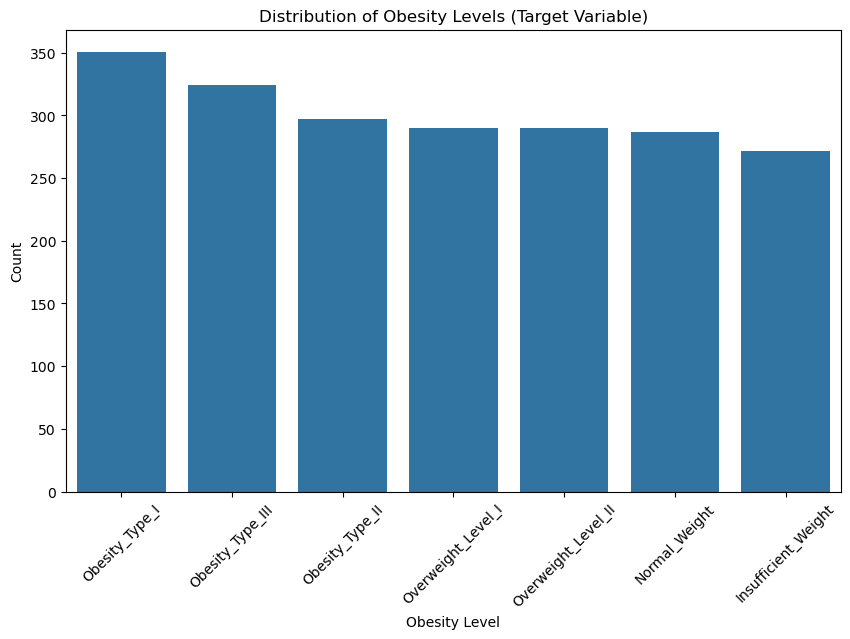


Target distribution (%)
NObeyesdad
Obesity_Type_I         16.63
Obesity_Type_III       15.35
Obesity_Type_II        14.07
Overweight_Level_I     13.74
Overweight_Level_II    13.74
Normal_Weight          13.60
Insufficient_Weight    12.88
Name: proportion, dtype: float64


In [28]:
# Dataset overview
print("Dataset shape:", obesity_df.shape)

# Check missing values
print("\nMissing values per column:")
print(obesity_df.isnull().sum())

# Target distribution
plt.figure(figsize=(10,6))
sns.countplot(data=obesity_df, x=target_col, order=obesity_df[target_col].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels (Target Variable)")
plt.ylabel("Count")
plt.xlabel("Obesity Level")
plt.show()

# Display target distribution in percentages
target_percent = obesity_df[target_col].value_counts(normalize=True) * 100
print("\nTarget distribution (%)")
print(target_percent.round(2))


**Observation:**  
The target variable is well balanced across all obesity categories, with each class representing a similar proportion of the dataset. Therefore, no resampling or class-balancing techniques are required before modeling.


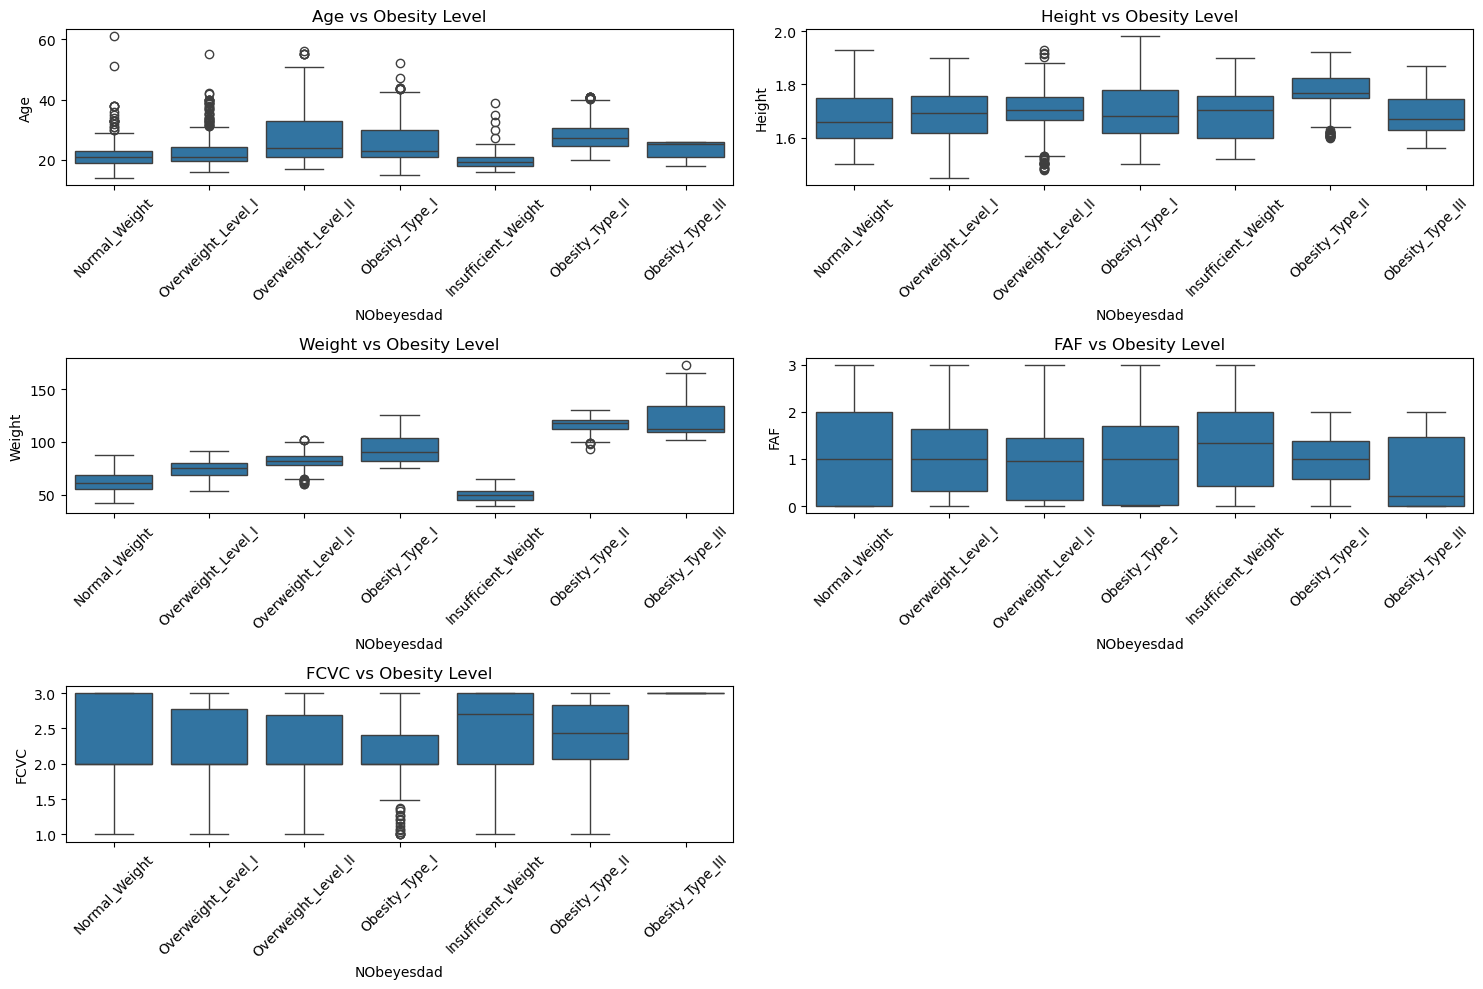

In [29]:
# List of numerical features
numerical_features = ["Age", "Height", "Weight", "FAF", "FCVC"]

plt.figure(figsize=(15,10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=obesity_df, x=target_col, y=feature)
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs Obesity Level")

plt.tight_layout()
plt.show()


**Observation:**  
Boxplots show how numerical features vary across obesity levels. Differences in Weight and Height clearly separate obesity categories, while lower physical activity (FAF) and lower vegetable consumption (FCVC) tend to be associated with higher obesity levels.


In [30]:
cat_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

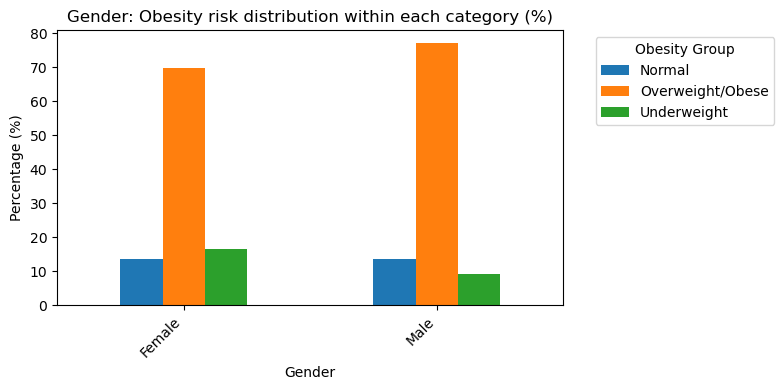

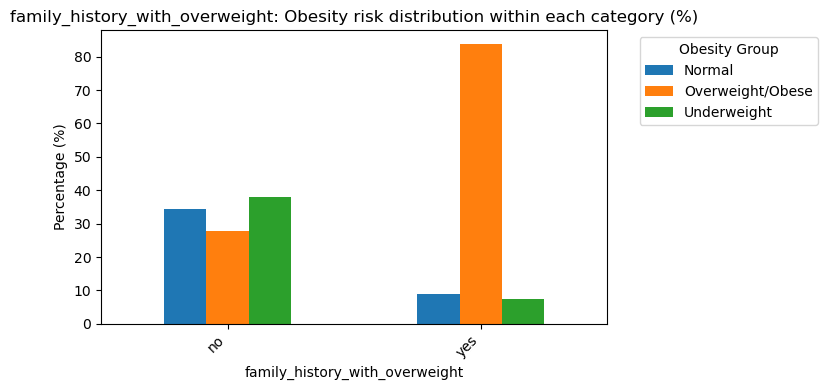

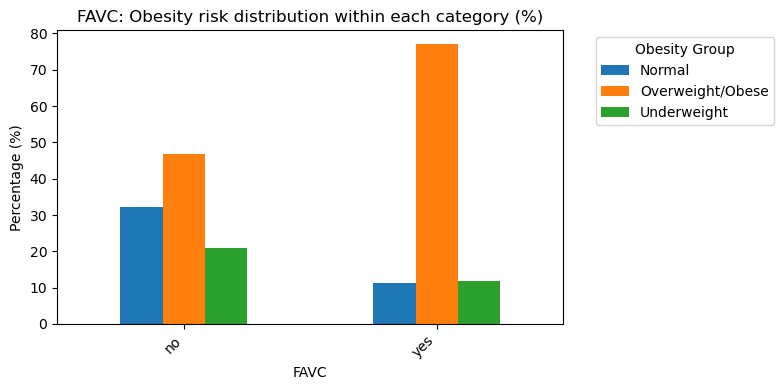

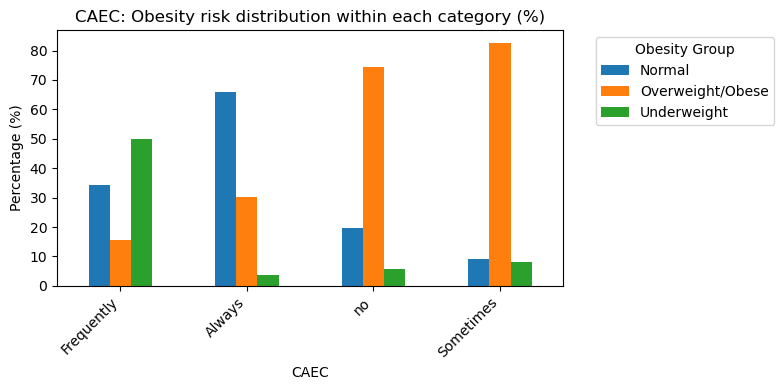

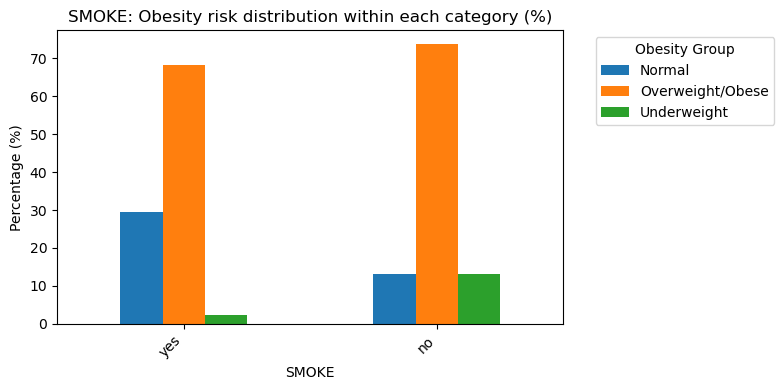

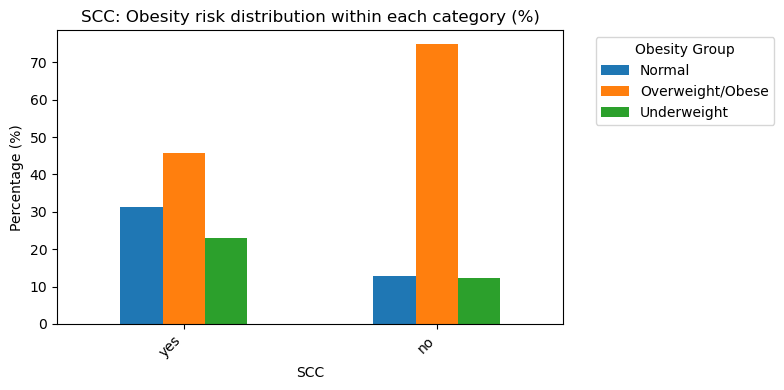

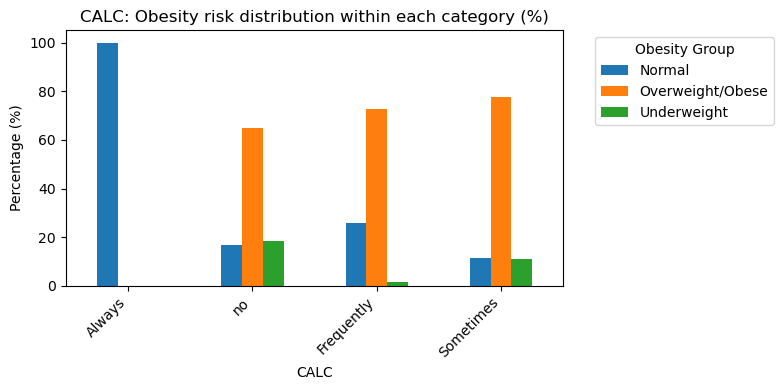

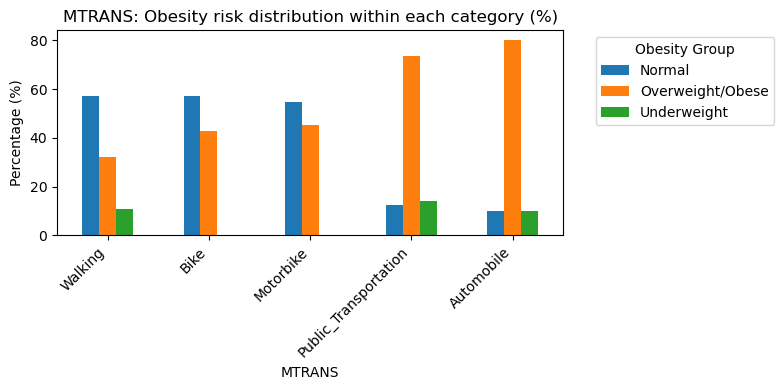

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Simplify target into 3 obesity risk groups for clearer visualization
obesity_groups = {
    "Insufficient_Weight": "Underweight",
    "Normal_Weight": "Normal",
    "Overweight_Level_I": "Overweight/Obese",
    "Overweight_Level_II": "Overweight/Obese",
    "Obesity_Type_I": "Overweight/Obese",
    "Obesity_Type_II": "Overweight/Obese",
    "Obesity_Type_III": "Overweight/Obese"
}

obesity_df["Obesity_Group"] = obesity_df[target_col].map(obesity_groups)

# Normalized (percentage) stacked bar plots for categorical features
for feature in cat_cols:
    # Create a normalized crosstab (row-wise percentages)
    ct = pd.crosstab(obesity_df[feature], obesity_df["Obesity_Group"], normalize="index") * 100
    
    # Order categories by % Overweight/Obese (from low to high) for readability
    if "Overweight/Obese" in ct.columns:
        ct = ct.sort_values("Overweight/Obese")
    
    ax = ct.plot(kind="bar", figsize=(8,4))
    plt.title(f"{feature}: Obesity risk distribution within each category (%)")
    plt.ylabel("Percentage (%)")
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Obesity Group", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


**Observation:**  
To avoid misleading conclusions from raw counts, we visualize normalized percentages within each category. This highlights how the proportion of individuals in the Overweight/Obese group changes across categories, making associations with obesity risk easier to interpret.


In [32]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test between each categorical feature and the grouped obesity target
chi2_results = []

for feature in cat_cols:
    contingency_table = pd.crosstab(obesity_df[feature], obesity_df["Obesity_Group"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({
        "Feature": feature,
        "Chi2 Statistic": chi2,
        "p-value": p
    })

chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2 Statistic", ascending=False)

chi2_df


,Feature,Chi2 Statistic,p-value
3,CAEC,649.293206,5.398077e-137
1,family_history_with_overweight,511.277809,9.493676e-112
7,MTRANS,131.653481,1.284707e-24
2,FAVC,111.074327,7.594801e-25
6,CALC,58.198350,1.044593e-10
5,SCC,41.398344,1.024386e-09
0,Gender,25.620285,2.732913e-06
4,SMOKE,12.510442,1.920401e-03


**Chi-Square Test Interpretation:**  
The Chi-Square test confirms strong statistical associations between several categorical features and obesity risk. Snacking frequency (CAEC) and family history of overweight show the highest dependency with obesity group categories, followed by transportation type (MTRANS) and frequent high-calorie food consumption (FAVC). All tested categorical variables present statistically significant p-values, indicating meaningful relationships with obesity risk.


### EDA Summary and Key Insights

From the exploratory analysis, several features show clear associations with obesity risk:

- **Weight and Height** strongly differentiate obesity categories, confirming their relevance for predicting obesity levels.
- **Lifestyle-related numerical variables**, such as physical activity frequency (FAF) and vegetable consumption (FCVC), show noticeable differences across obesity classes.
- **Categorical features** including snacking frequency (CAEC), family history of overweight, frequent high-calorie food consumption (FAVC), and transportation type (MTRANS) present strong associations with obesity risk. These relationships were confirmed both through normalized percentage visualizations and Chi-Square statistical testing.
- The **target variable is well balanced**, so no class rebalancing techniques are required.

Based on these observations, we proceed to preprocessing and modeling.


## Train - test split

In [44]:
# Clean up EDA-only columns before modeling
if "Obesity_Group" in obesity_df.columns:
    obesity_df = obesity_df.drop(columns=["Obesity_Group"])

In [45]:
target_col = "NObeyesdad"
X = obesity_df.drop(columns=[target_col])
y = obesity_df[target_col]

In [46]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Normalization, Scaling, One-hot encoding

In [48]:
# first create a list of categorical
cat_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

In [49]:
# then the numerical variables
num_cols = [c for c in X.columns if c not in cat_cols]

In [50]:
# build a BMI feature as a decent estsimator of obesity
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class BMICreator(BaseEstimator, TransformerMixin):
    def __init__(self, height_col="Height", weight_col="Weight"):
        self.height_col = height_col
        self.weight_col = weight_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        bmi = X[self.weight_col] / (X[self.height_col] ** 2)
        X["BMI"] = bmi
        return X


In [51]:
# preprocessing pipeline
# scaling numberical features and encoding categorical

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = Pipeline(
    steps=[
        ("bmi", BMICreator()),
        ("columns", ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), num_cols + ["BMI"]),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ]
        ))
    ]
)


## KNN pipeline

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[("perp", preprocess), ("model", KNeighborsClassifier())])

In [53]:
X_train.select_dtypes(include=["object"]).columns


Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [54]:
X.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [55]:
knn.fit(X_train, y_train)

Pipeline(steps=[('perp',
                 Pipeline(steps=[('bmi', BMICreator()),
                                 ('columns',
                                  ColumnTransformer(transformers=[('num',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE',
                                                                    'BMI']),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS'])]))])),
                ('model', KNeighborsClassifier())])

## Evaluate model performance

In [56]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
y_pred = knn.predict(X_test)

print("Accuracy:", f"{accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.87


                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.96      0.87        54
      Normal_Weight       0.82      0.53      0.65        58
     Obesity_Type_I       0.85      0.96      0.90        70
    Obesity_Type_II       0.97      0.98      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.78      0.72      0.75        58
Overweight_Level_II       0.84      0.88      0.86        58

           accuracy                           0.87       423
          macro avg       0.86      0.86      0.86       423
       weighted avg       0.87      0.87      0.86       423



<Axes: >

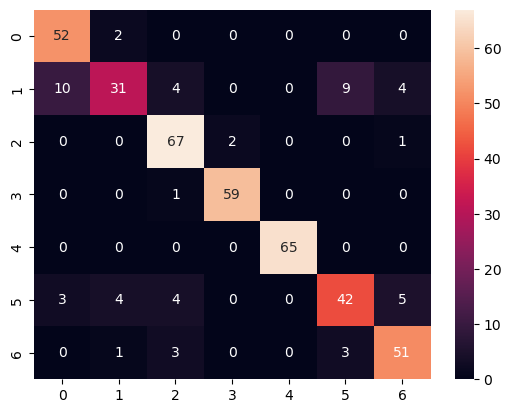

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


## Hyperparameter Tuning

### Cross-validation

#### Is my KNN performance stable, or is it dependent on one lucky train–test split?

In [62]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring='accuracy'
)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.9858156  0.97393365 0.99052133 0.97393365 0.98104265]
Mean accuracy: 0.9810493764915466
Standard deviation: 0.0065376135203861745


#### The model performs consistently well across different splits of the training data, with limited variability, indicating stable generalization rather than reliance on a single train–test split.

High mean accuracy (97.02%) -> The model performs very well overall, correctly classifying the obesity category for the vast majority of samples across different data splits.

Low standard deviation (≈ 1.1%) -> The performance varies very little between folds. This indicates that the model is stable and not overly sensitive to how the data is split.

Consistency across folds -> All fold accuracies are close to each other (between ~95.5% and ~98.6%), which suggests:

Good generalization
Low risk of overfitting
The dataset is well represented across folds (helped by stratified CV)

### Grid-search

#### Which hyperparameters generalize best?

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best CV accuracy: 0.9631127245022576


Best hyperparameters found

n_estimators = 100 -> The model uses 100 decision trees, which provides sufficient ensemble diversity while keeping computational cost reasonable.

max_depth = 20 -> Limits how deep each tree can grow, preventing overly complex trees and reducing overfitting.

min_samples_split = 2 -> Allows a node to be split as long as it contains at least two samples, enabling the model to capture meaningful patterns.

min_samples_leaf = 1 -> Permits leaves with a single sample, maintaining model flexibility while still being constrained by the depth limit.

Best CV accuracy: 94.89% -> This value represents the average accuracy across all cross-validation folds using the selected hyperparameters.

## Feature Impact

#### Does removing a feature change cross-validated performance?

Method

- Start from our baseline pipeline KNN.
- Remove one feature (or group).
- Re-run cross-validation.
- Compare the mean score to the baseline.

In [71]:
# Step 1: establish baseline CV score (keep this number)
baseline_scores = cross_val_score(
    knn, X_train, y_train, cv=cv, scoring="accuracy"
)

baseline_scores.mean()

np.float64(0.8465611995856233)

This is the mean baseline accuracy over cross-validation folds

##### Now we check how removing features improves or worsens the accuracy compared to the above baseline.

In [74]:
# Removing Physical Activity [FAF], rebuilding the preprocessing, and re-evaluating:
num_cols_no_faf = [c for c in num_cols if c != "FAF"]

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

preprocess_no_faf = Pipeline(
    steps=[
        ("bmi", BMICreator()),
        ("columns", ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), num_cols_no_faf + ["BMI"]),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ]
        ))
    ]
)

knn_no_faf = Pipeline(
    steps=[
        ("preprocess", preprocess_no_faf),
        ("model", KNeighborsClassifier())
    ]
)


scores_drop = cross_val_score(
    knn_no_faf,     # use the new pipeline
    X_train,        # full dataframe
    y_train,
    cv=cv,
    scoring="accuracy"
)

scores_drop.mean()



np.float64(0.8530841219953296)

In [75]:
# now we will do the same using a funciton for all the other numerical features
def ablation_accuracy(feature_to_remove):
    num_cols_reduced = [c for c in num_cols if c != feature_to_remove]

    preprocess_reduced = Pipeline(
        steps=[
            ("bmi", BMICreator()),
            ("columns", ColumnTransformer(
                transformers=[
                    ("num", StandardScaler(), num_cols_reduced + ["BMI"]),
                    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                ]
            ))
        ]
    )

    knn_reduced = Pipeline(
        steps=[
            ("preprocess", preprocess_reduced),
            ("model", KNeighborsClassifier())
        ]
    )

    scores = cross_val_score(
        knn_reduced, X_train, y_train, cv=cv, scoring="accuracy"
    )
    return scores.mean()

feature_impact = {}

for feature in num_cols:
    feature_impact[feature] = ablation_accuracy(feature)

feature_impact


{'Age': np.float64(0.8412410232999139),
 'Height': np.float64(0.8382771759169841),
 'Weight': np.float64(0.8293803662669219),
 'FCVC': np.float64(0.8518883992063631),
 'NCP': np.float64(0.8394623637034047),
 'CH2O': np.float64(0.8507190139237617),
 'FAF': np.float64(0.8530841219953296),
 'TUE': np.float64(0.8519006900426668)}

All in all:
Most features are relevant to the model, with minor increases or decreases in the model's accuracy if they are removed or not.

## Ensemble Model

#### Does an ensemble model outperform KNN?

In [76]:
# Step 1: define the ensemble pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(random_state=42))
    ]
)


In [77]:
# Step 2: cross-validate the ensemble (same CV, same metric)
rf_scores = cross_val_score(
    rf, X_train, y_train, cv=cv, scoring="accuracy"
)

rf_scores.mean(), rf_scores.std()


(np.float64(0.9822274507049673), np.float64(0.007736623952563809))

An ensemble model (Random Forest) was evaluated using the same preprocessing and cross-validation strategy; its performance was compared against KNN to assess whether combining multiple learners improved predictive accuracy.

RF score >> KNN accuracy score, therefore, Ensemble model improves drastically the performance of our model.

Cross-validation evaluates a model; an ensemble is a different, more powerful model being evaluated.

In [89]:
# mapping target columns from 7 categories to 3 risk scores
risk_map = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 1,
    "Obesity_Type_I": 2,
    "Obesity_Type_II": 2,
    "Obesity_Type_III": 2,
}

y_risk = y.map(risk_map)


# KNN clustering target to risk score [0,1,2]

## Model creation and evaluation

In [90]:
# creating train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_risk, test_size=0.2, random_state=42, stratify=y_risk
)


In [88]:
# preprocessing
cat_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]
num_cols = [c for c in X.columns if c not in cat_cols]
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class BMICreator(BaseEstimator, TransformerMixin):
    def __init__(self, height_col="Height", weight_col="Weight"):
        self.height_col = height_col
        self.weight_col = weight_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        bmi = X[self.weight_col] / (X[self.height_col] ** 2)
        X["BMI"] = bmi
        return X
# preprocessing pipeline
# scaling numberical features and encoding categorical

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = Pipeline(
    steps=[
        ("bmi", BMICreator()),
        ("columns", ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), num_cols + ["BMI"]),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ]
        ))
    ]
)

In [91]:
# KNN pipeline
knn_risk = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", KNeighborsClassifier())
    ]
)

knn_risk.fit(X_train_r, y_train_r)


Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bmi', BMICreator()),
                                 ('columns',
                                  ColumnTransformer(transformers=[('num',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE',
                                                                    'BMI']),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS'])]))])),
                ('model', KNeighborsClassifier())])

In [86]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred_risk = knn_risk.predict(X_test_r)

accuracy_score(y_test_r, y_pred_risk)
print(classification_report(y_test_r, y_pred_risk))


              precision    recall  f1-score   support

           0       0.96      0.79      0.87       112
           1       0.80      0.95      0.87       116
           2       0.99      0.98      0.98       195

    accuracy                           0.92       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.93      0.92      0.92       423



In [84]:
# Cross-validation
cv_scores_risk = cross_val_score(
    knn_risk, X_train_r, y_train_r, cv=cv, scoring="accuracy"
)

cv_scores_risk.mean(), cv_scores_risk.std()


(np.float64(0.9105472933822625), np.float64(0.009410966579005855))

In [85]:
# Grid-search
param_grid = {
    "model__n_neighbors": [3, 5, 7, 11, 15],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan"],
}

gs_risk = GridSearchCV(
    knn_risk, param_grid, cv=cv, scoring="accuracy"
)

gs_risk.fit(X_train_r, y_train_r)

gs_risk.best_params_
gs_risk.best_score_


np.float64(0.9401717205414991)

In [92]:
# Feature impact (ablation)
baseline_scores_risk = cross_val_score(
    knn_risk, X_train_r, y_train_r, cv=cv, scoring="accuracy"
)

baseline_risk_mean = baseline_scores_risk.mean()
baseline_risk_mean


np.float64(0.9105472933822625)

In [93]:
def ablation_accuracy_risk(feature_to_remove):
    num_cols_reduced = [c for c in num_cols if c != feature_to_remove]

    preprocess_reduced = Pipeline(
        steps=[
            ("bmi", BMICreator()),
            ("columns", ColumnTransformer(
                transformers=[
                    ("num", StandardScaler(), num_cols_reduced + ["BMI"]),
                    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                ]
            ))
        ]
    )

    knn_reduced = Pipeline(
        steps=[
            ("preprocess", preprocess_reduced),
            ("model", KNeighborsClassifier())
        ]
    )

    scores = cross_val_score(
        knn_reduced, X_train_r, y_train_r, cv=cv, scoring="accuracy"
    )
    return scores.mean()


In [94]:
risk_feature_impact = {}

for feature in num_cols:
    risk_feature_impact[feature] = ablation_accuracy_risk(feature)

risk_feature_impact


{'Age': np.float64(0.9069899741892439),
 'Height': np.float64(0.9016645304022616),
 'Weight': np.float64(0.8933682158973187),
 'FCVC': np.float64(0.9075957368356363),
 'NCP': np.float64(0.9111460326936246),
 'CH2O': np.float64(0.9105314908784437),
 'FAF': np.float64(0.9099573332396889),
 'TUE': np.float64(0.9170702157919688)}

In [95]:
# compare to baseline
risk_feature_delta = {
    f: baseline_risk_mean - score
    for f, score in risk_feature_impact.items()
}

risk_feature_delta


{'Age': np.float64(0.0035573191930186043),
 'Height': np.float64(0.008882762980000902),
 'Weight': np.float64(0.01717907748494374),
 'FCVC': np.float64(0.002951556546626155),
 'NCP': np.float64(-0.0005987393113621176),
 'CH2O': np.float64(1.5802503818829194e-05),
 'FAF': np.float64(0.0005899601425736201),
 'TUE': np.float64(-0.006522922409706311)}

91% vs 85% does not mean the risk-based model is “better” than the original one using all 7 categories in an absolute sense.
This model is more reliable at coarse risk stratification than at fine-grained classification.

Reformulating the target into three obesity risk levels increased cross-validated accuracy, indicating that the model captures broad risk patterns more reliably than fine-grained obesity subtypes, at the cost of granularity.

## EDA on changed model

In [96]:
risk_map = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 1,
    "Obesity_Type_I": 2,
    "Obesity_Type_II": 2,
    "Obesity_Type_III": 2,
}

obesity_df["Obesity_Risk"] = obesity_df[target_col].map(risk_map)


In [100]:
risk_labels = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}


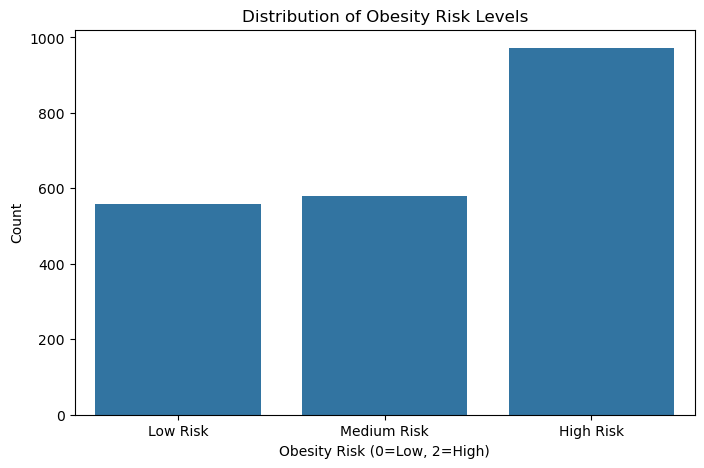

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=obesity_df,
    x="Obesity_Risk",
    order=[0, 1, 2]
)
plt.title("Distribution of Obesity Risk Levels")
plt.xlabel("Obesity Risk (0=Low, 2=High)")
plt.ylabel("Count")
plt.xticks([0,1,2], ["Low Risk", "Medium Risk", "High Risk"])
plt.show()


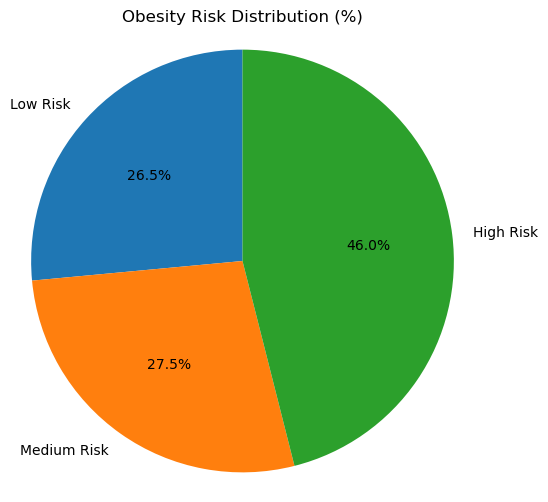

In [103]:
import matplotlib.pyplot as plt

# percentage distribution
risk_percent = obesity_df["Obesity_Risk"].value_counts(normalize=True).sort_index() * 100

labels = ["Low Risk", "Medium Risk", "High Risk"]
sizes = risk_percent.values

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Obesity Risk Distribution (%)")
plt.axis("equal")  # keeps it circular
plt.show()


In [98]:
freq_order = ["no", "Sometimes", "Frequently", "Always"]


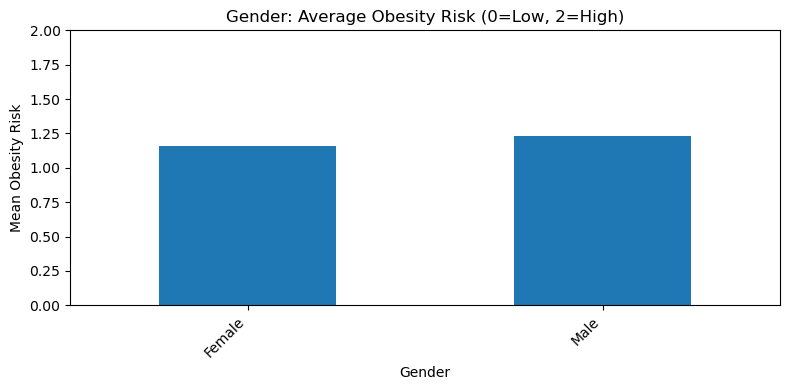

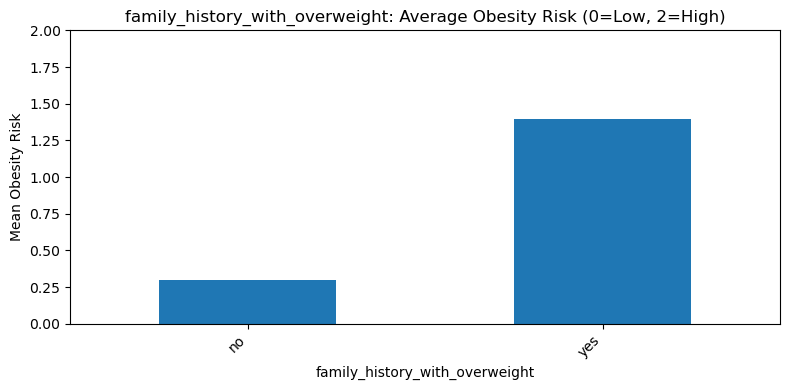

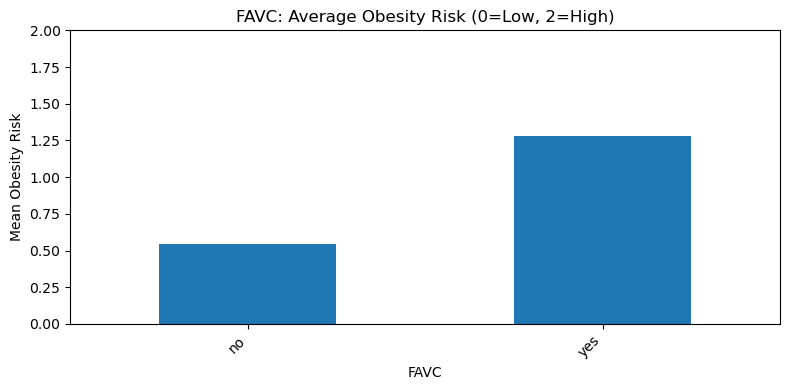

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_22613/3883530088.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(feature)["Obesity_Risk"]


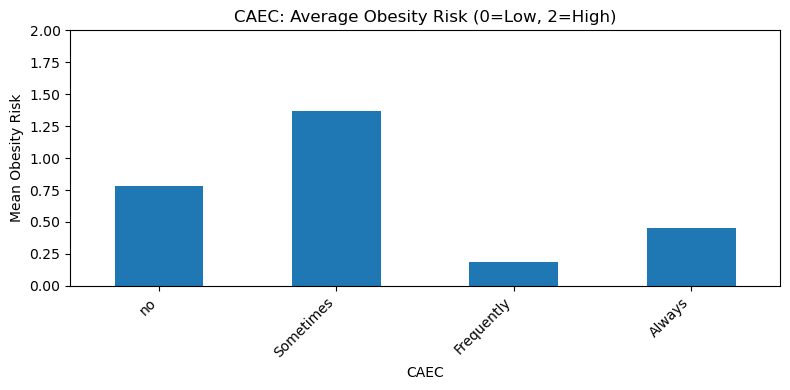

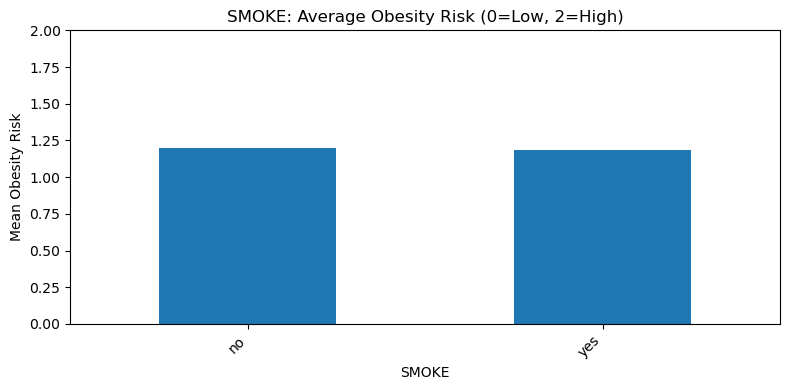

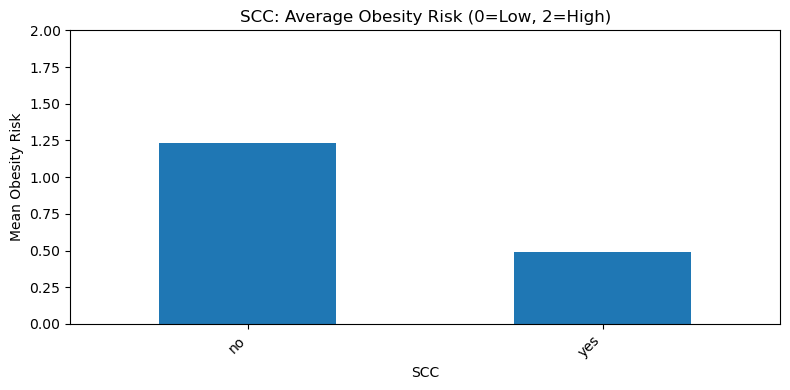

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_22613/3883530088.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(feature)["Obesity_Risk"]


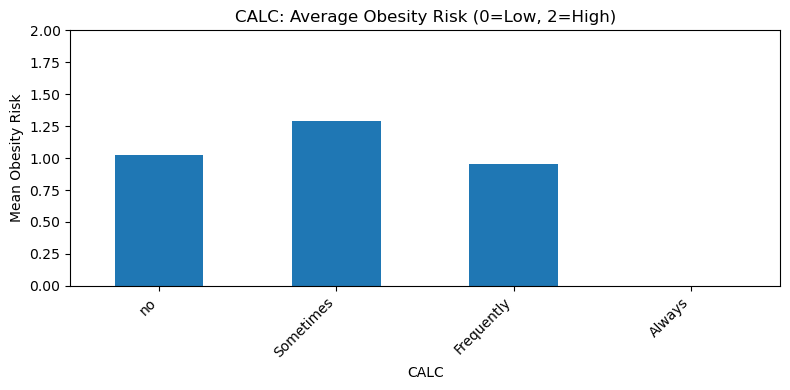

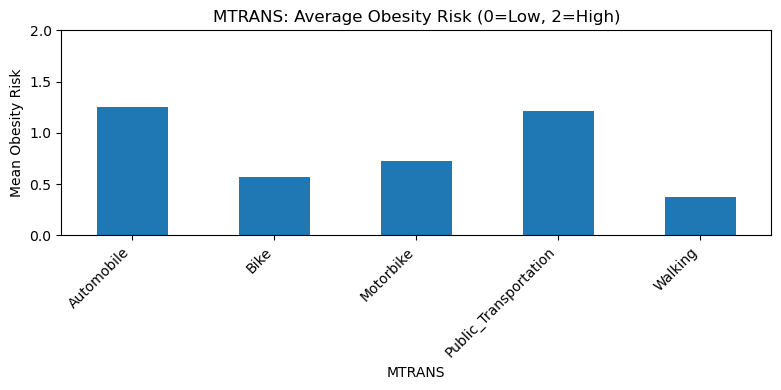

In [99]:
import matplotlib.pyplot as plt

for feature in cat_cols:
    df_plot = obesity_df.copy()

    # enforce order only for frequency-based features
    if feature in ["CALC", "CAEC"]:
        df_plot[feature] = pd.Categorical(
            df_plot[feature],
            categories=freq_order,
            ordered=True
        )

    mean_risk = (
        df_plot
        .groupby(feature)["Obesity_Risk"]
        .mean()
        .sort_index()  # respects categorical order if defined
    )

    mean_risk.plot(kind="bar", figsize=(8,4))
    plt.title(f"{feature}: Average Obesity Risk (0=Low, 2=High)")
    plt.ylabel("Mean Obesity Risk")
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 2)
    plt.tight_layout()
    plt.show()

